In [1]:
using DrWatson
@quickactivate "DrivenKerrResonator"

using HarmonicBalance, Plots

Threads.nthreads() # check number of threads

10

## 1st order driven duffing oscillator

In [2]:
@variables β α ω ω0 F γ t x(t) # declare constant variables and a function x(t)
diff_eq = DifferentialEquation(d(x,t,2) + ω0^2*x + β*x^2 + α*x^3 + γ*d(x,t) ~ F*cos(ω*t), x)

add_harmonic!(diff_eq, x, ω) # specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: β, ω, α, ω0, γ, F

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)

Harmonic equations:

γ*Differential(T)(u1(T)) + (ω0^2)*u1(T) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^2)*u1(T) - (ω^2)*u1(T) ~ F

(ω0^2)*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^3) + (3//4)*α*(u1(T)^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - (ω^2)*v1(T) - γ*ω*u1(T) ~ 0


In [3]:
harmonic_eq.equations

2-element Vector{Symbolics.Equation}:
 γ*Differential(T)(u1(T)) + (ω0^2)*u1(T) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^2)*u1(T) - (ω^2)*u1(T) ~ F
 (ω0^2)*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^3) + (3//4)*α*(u1(T)^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - (ω^2)*v1(T) - γ*ω*u1(T) ~ 0

If we both have quadratic and cubic nonlineariy, we observe the normal duffing oscillator respons.

Computing mixed cells... 2 	 Time: 0:00:00
  mixed_volume:  6

Computing mixed cells... 4 	 Time: 0:00:00
  mixed_volume:  9

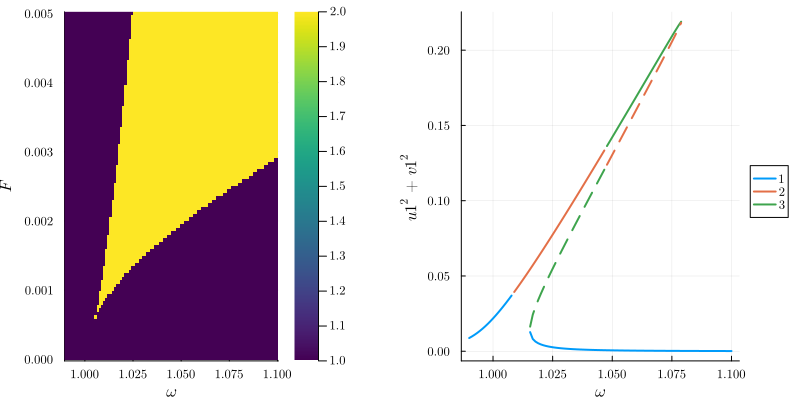

In [4]:
varied = (ω => range(0.99, 1.1, 100), F => range(1e-6, 0.005, 100)) # range of parameter values
fixed = (α => 1.0, β => 1.0, ω0 => 1.0, γ => 0.005) # fixed parameters

result = get_steady_states(harmonic_eq, varied, fixed, show_progress=false, threading=true, random_warmup=true) # solve for steady states

p1 = plot_phase_diagram(result, class="stable") # plot phase diagram 
p2 = plot(result, y = "u1^2+v1^2", cut = F => 0.0025)
plot(p1, p2, layout = (1,2), size = (800, 400))

If we set the cubic nonlinearity to zero, we recover the driven damped harmonic oscillator. Indeed, thefirst order the quadratic nonlinearity has no affect on the system.

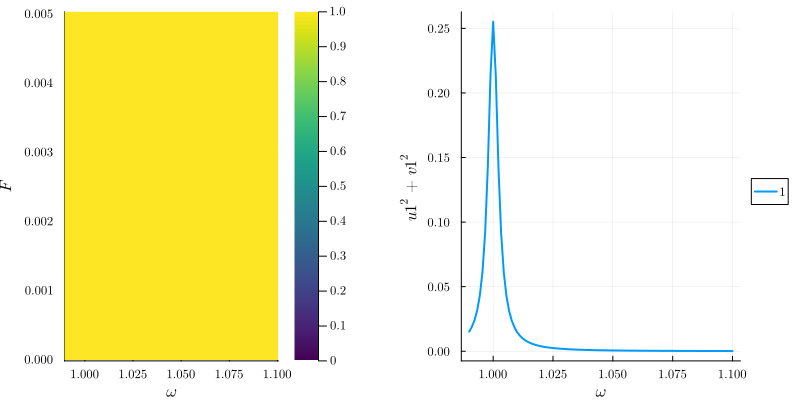

In [5]:
varied = (ω => range(0.99, 1.1, 100), F => range(1e-6, 0.005, 100)) # range of parameter values
fixed = (α => 0.0, β => 1.0, ω0 => 1.0, γ => 0.005) # fixed parameters

result = get_steady_states(harmonic_eq, varied, fixed, show_progress=false, threading=true, random_warmup=true) # solve for steady states

p1 = plot_phase_diagram(result, class="stable") # plot phase diagram 
p2 = plot(result, y = "u1^2+v1^2", cut = F => 0.0025)
plot(p1, p2, layout = (1,2), size = (800, 400))

## 2nd order driven duffing oscillator

The quadratic nonlinearity $\beta$ together with the drive at 2ω gives the effective parametric drive $\lambda_\mathrm{eff}=\frac{2F_1\beta}{3m\omega^2}$. But the cubic nonlinearity $\alpha$ is still needed to get the period doubling bifurcation through $\lambda_\mathrm{eff}$.

In [13]:
@variables β α ω ω0 F γ t x(t) # declare constant variables and a function x(t)
diff_eq = DifferentialEquation(d(x,t,2) + ω0^2*x + β*x^2 + α*x^3 + γ*d(x,t) ~ F*cos(2ω*t), x)

add_harmonic!(diff_eq, x, ω) # specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)
harmonic_eq2 = get_krylov_equations(diff_eq, order=2)

# harmonic_eq2.equations

A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: ω, F, β, α, γ, ω0

Harmonic ansatz: 
xˍt(t) = 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)

Harmonic equations:

((1//2)*(ω^2)*v1(T) - (3//8)*α*(v1(T)^3) - (1//2)*(ω0^2)*v1(T) - (1//2)*γ*ω*u1(T) - (3//8)*α*(u1(T)^2)*v1(T)) / ω + ((1//8)*(ω^4)*v1(T) + (1//8)*(ω0^4)*v1(T) + (51//256)*(α^2)*(v1(T)^5) + (5//12)*(β^2)*(v1(T)^3) + (1//8)*(γ^2)*(ω^2)*v1(T) + (3//8)*α*(ω0^2)*(v1(T)^3) + (51//128)*(α^2)*(u1(T)^2)*(v1(T)^3) + (51//256)*(α^2)*(u1(T)^4)*v1(T) + (5//12)*(β^2)*(u1(T)^2)*v1(T) + (3//8)*α*(ω0^2)*(u1(T)^2)*v1(T) - (3//8)*α*(ω^2)*(v1(T)^3) - (1//6)*F*β*v1(T) - (1//4)*(ω^2)*(ω0^2)*v1(T) - (3//8)*α*(ω^2)*(u1(T)^2)*v1(T)) / (ω^3) ~ Differential(T)(u1(T))

((3//8)*α*(u1(T)^3) + (1//2)*(ω0^2)*u1(T) + (3//8)*α*(v1(T)^2)*u1(T) - (1//2)*(ω^2)*u1(T) - (1//2)*γ*ω*v1(T)) / ω + ((3//8)*α*(ω^2)*(u1(T)^3) + (1//4)*(ω^2)*(ω0^2)*u1(T) + (3//8)*α*(ω^2)*(v1(T)^2)*u1(T) - (1//8)*(ω^4)*u1(T) - (5//12)*(β^2)*(u1(T)^3) - (51//256)*(α^2)*(u1(T)^5) - (

┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! branch 1
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\HarmonicBalance\lL9Ii\src\plotting_Plots.jl:106
┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! branch 1
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\HarmonicBalance\lL9Ii\src\plotting_Plots.jl:106


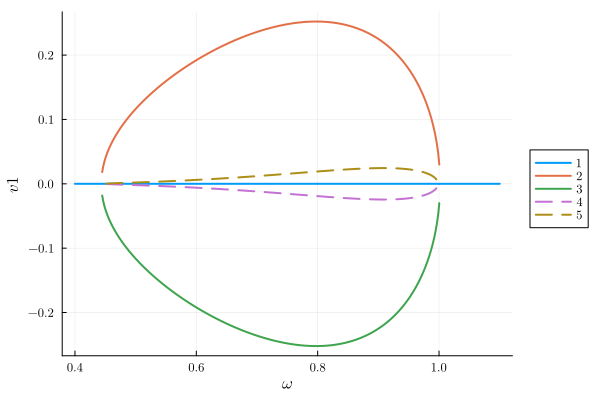

In [22]:
varied = (ω => range(0.4, 1.1, 500)) # range of parameter values
fixed = (α => 1.0, β => 2.0, ω0 => 1.0, γ => 0.001, F => 0.005) # fixed parameters

result = get_steady_states(harmonic_eq2, varied, fixed, show_progress=false, threading=true, random_warmup=false) # solve for steady states
p2 = plot(result, y = "v1")

In [15]:
varied = (ω => range(0.4, 0.8, 200), F => range(1e-6, 0.01, 20)) # range of parameter values
fixed = (α => 1.0, β => 2.0, ω0 => 1.0, γ => 0.01) # fixed parameters

result = get_steady_states(harmonic_eq2, varied, fixed, show_progress=false, threading=true, random_warmup=false) # solve for steady states

A steady state result for 2000 parameter points

Solution branches:   9
   of which real:    5
   of which stable:  5

Classes: stable, physical, Hopf, binary_labels


┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! branch 5
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\HarmonicBalance\lL9Ii\src\plotting_Plots.jl:106
┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! 
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\HarmonicBalance\lL9Ii\src\plotting_Plots.jl:106
┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! branch 5
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\HarmonicBalance\lL9Ii\src\plotting_Plots.jl:106
┌ Warning: Values with non-negligible complex parts have
│             been projected on the real axis! 
└ @ HarmonicBalance C:\Users\orjan\.julia\packages\HarmonicBalance\lL9Ii\src\plotting_Plots.jl:106


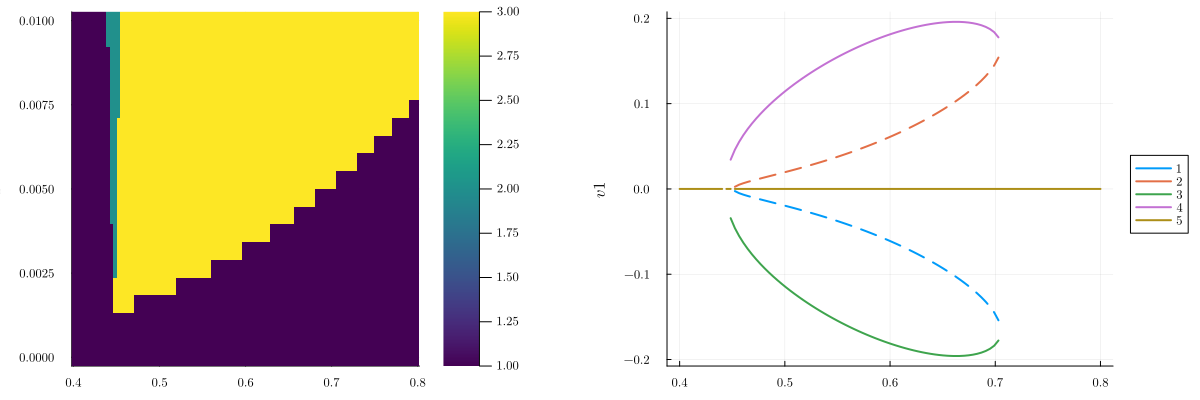

In [16]:
p1 = plot_phase_diagram(result, class="stable") # plot phase diagram 
p2 = plot(result, y = "v1", cut = F => 0.005)
plot(p1, p2, layout = (1,2), size = (1200, 400))